In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X=np.array(10*np.random.randn(37,5))

In [3]:
df=pd.DataFrame(X,columns=['Feature'+str(l) for l in range(1,6)])
df.head(5)

,Feature1,Feature2,Feature3,Feature4,Feature5
0,1.617382,5.390393,9.157499,-3.758258,6.074100
1,-6.504579,11.484090,-10.333125,-27.050198,19.845082
2,12.361566,1.988473,13.435316,1.876341,12.347619
3,0.732799,7.256150,16.646740,-4.087766,-7.537384
4,-22.158071,14.768856,13.428119,16.419616,-3.514585


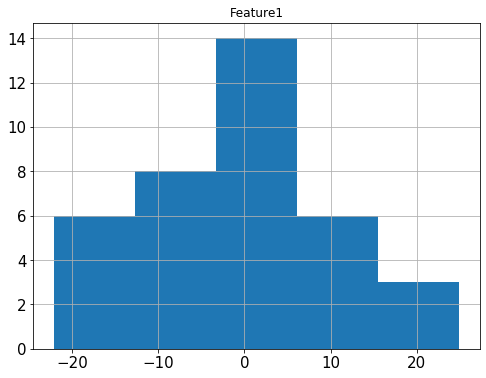

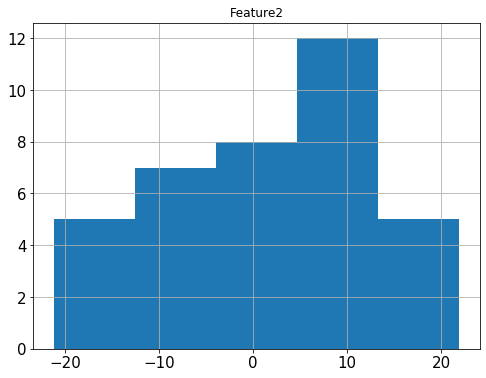

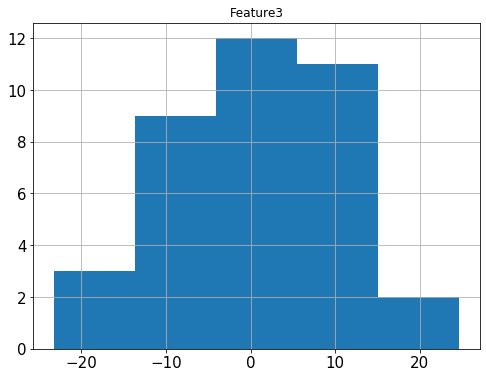

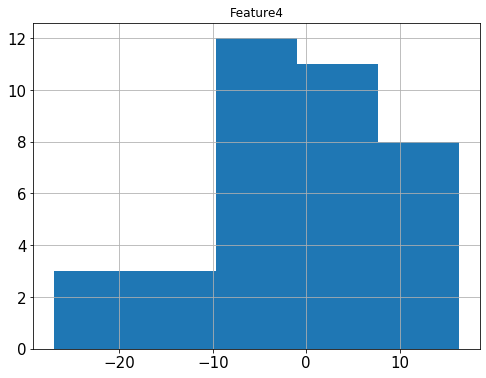

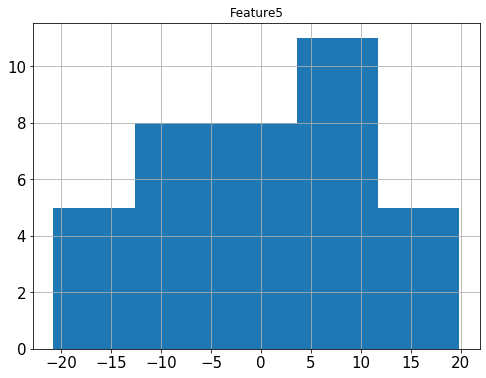

In [4]:
for i in df.columns:
    df.hist(i,bins=5,xlabelsize=15,ylabelsize=15,figsize=(8,6))

In [5]:
df['y']=5*df['Feature1']**2+13*df['Feature2']+0.1*df['Feature3']**2*df['Feature1']
+2*df['Feature4']*df['Feature5']+0.1*df['Feature5']**3+0.8*df['Feature1']*df['Feature4']*df['Feature5']
+30*np.random.normal(loc=5,scale=2)

115.56549648103211

In [6]:
df.head(10)

,Feature1,Feature2,Feature3,Feature4,Feature5,y
0,1.617382,5.390393,9.157499,-3.758258,6.074100,96.718071
1,-6.504579,11.484090,-10.333125,-27.050198,19.845082,291.389290
2,12.361566,1.988473,13.435316,1.876341,12.347619,1013.027473
3,0.732799,7.256150,16.646740,-4.087766,-7.537384,117.321822
4,-22.158071,14.768856,13.428119,16.419616,-3.514585,2247.353888
5,1.309858,-18.217582,12.330441,13.468985,5.725649,-208.334886
6,2.837306,13.904927,-9.283206,-6.217069,-17.986315,245.466889
7,-14.864896,8.911615,-1.557173,-6.086586,-17.188705,1217.072275
8,-7.905750,-6.449837,6.741928,-19.715399,0.064817,192.722051
9,-2.106326,12.215813,1.071719,7.553627,-17.884033,180.746687


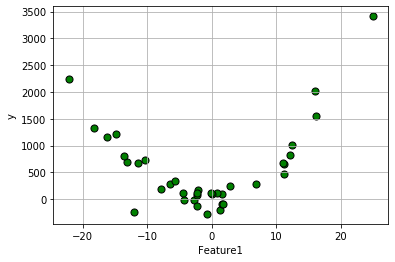

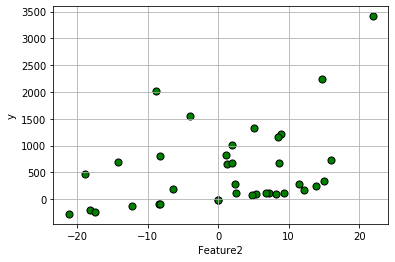

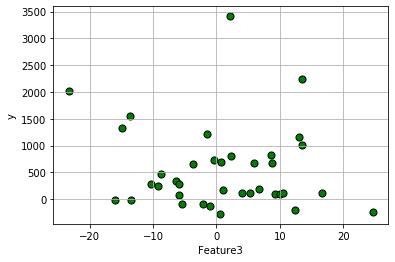

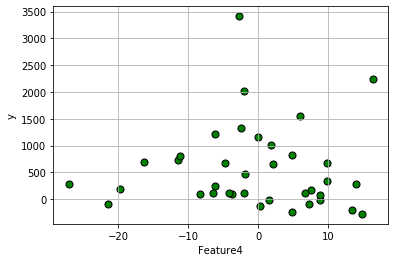

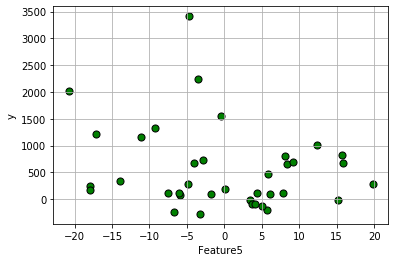

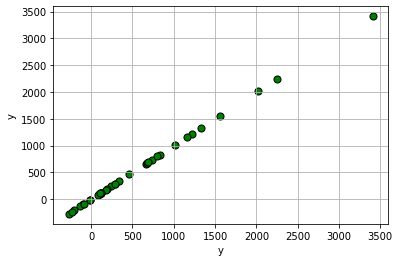

In [7]:
for i in df.columns:
    df.plot.scatter(i,'y', edgecolors=(0,0,0),s=50,c='g',grid=True)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
linear_model = LinearRegression(normalize=True)

X_linear=df.drop('y',axis=1)
y_linear=df['y']

In [10]:
linear_model.fit(X_linear,y_linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [11]:
y_pred_linear = linear_model.predict(X_linear)

In [12]:
RMSE_linear = np.sqrt(np.sum(np.square(y_pred_linear-y_linear)))
print("Root-mean-square error of linear model:",RMSE_linear)

Root-mean-square error of linear model: 4077.946790456688


In [13]:
coeff_linear = pd.DataFrame(linear_model.coef_,index=df.drop('y',axis=1).columns, columns=['Linear model coefficients'])
coeff_linear

,Linear model coefficients
Feature1,18.298886
Feature2,25.877255
Feature3,-4.435841
Feature4,-2.057859
Feature5,-12.665568


In [14]:
print ("R2 value of linear model:",linear_model.score(X_linear,y_linear))

R2 value of linear model: 0.2379227363573367


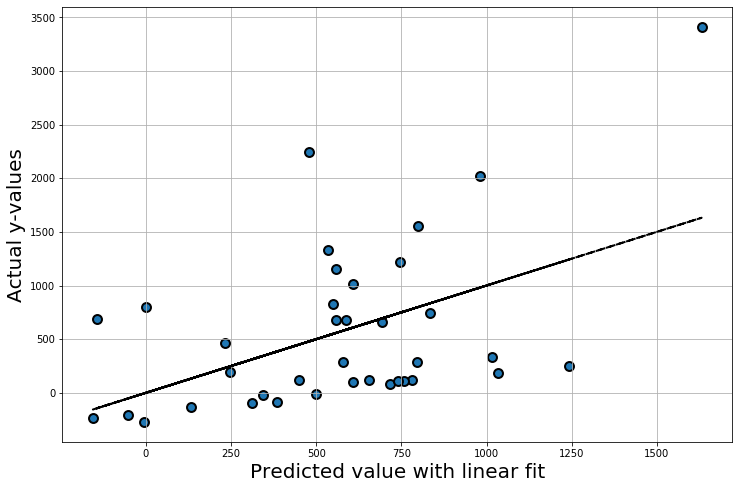

In [15]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted value with linear fit",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred_linear,y_linear,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred_linear,y_pred_linear, 'k--', lw=2)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly = PolynomialFeatures(3,include_bias=False)

In [18]:
X_poly = poly.fit_transform(X)
X_poly_feature_name = poly.get_feature_names(['Feature'+str(l) for l in range(1,6)])
print(X_poly_feature_name)
print(len(X_poly_feature_name))

['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature1^2', 'Feature1 Feature2', 'Feature1 Feature3', 'Feature1 Feature4', 'Feature1 Feature5', 'Feature2^2', 'Feature2 Feature3', 'Feature2 Feature4', 'Feature2 Feature5', 'Feature3^2', 'Feature3 Feature4', 'Feature3 Feature5', 'Feature4^2', 'Feature4 Feature5', 'Feature5^2', 'Feature1^3', 'Feature1^2 Feature2', 'Feature1^2 Feature3', 'Feature1^2 Feature4', 'Feature1^2 Feature5', 'Feature1 Feature2^2', 'Feature1 Feature2 Feature3', 'Feature1 Feature2 Feature4', 'Feature1 Feature2 Feature5', 'Feature1 Feature3^2', 'Feature1 Feature3 Feature4', 'Feature1 Feature3 Feature5', 'Feature1 Feature4^2', 'Feature1 Feature4 Feature5', 'Feature1 Feature5^2', 'Feature2^3', 'Feature2^2 Feature3', 'Feature2^2 Feature4', 'Feature2^2 Feature5', 'Feature2 Feature3^2', 'Feature2 Feature3 Feature4', 'Feature2 Feature3 Feature5', 'Feature2 Feature4^2', 'Feature2 Feature4 Feature5', 'Feature2 Feature5^2', 'Feature3^3', 'Feature3^2 Feature4', 'F

In [19]:
df_poly = pd.DataFrame(X_poly, columns=X_poly_feature_name)
df_poly.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature1^2,Feature1 Feature2,Feature1 Feature3,Feature1 Feature4,Feature1 Feature5,...,Feature3^3,Feature3^2 Feature4,Feature3^2 Feature5,Feature3 Feature4^2,Feature3 Feature4 Feature5,Feature3 Feature5^2,Feature4^3,Feature4^2 Feature5,Feature4 Feature5^2,Feature5^3
0,1.617382,5.390393,9.157499,-3.758258,6.074100,2.615925,8.718326,14.811175,-6.078539,9.824140,...,767.945894,-315.166675,509.372697,129.345093,-209.047669,337.863053,-53.083509,85.793621,-138.659736,224.102005
1,-6.504579,11.484090,-10.333125,-27.050198,19.845082,42.309553,-74.699176,67.212629,175.950161,-129.083913,...,-1103.303491,-2888.243320,2118.928151,-7560.883783,5546.959768,-4069.466420,-19792.987381,14520.908909,-10653.106147,7815.534915
2,12.361566,1.988473,13.435316,1.876341,12.347619,152.808308,24.580638,166.081537,23.194512,152.635906,...,2425.177973,338.693992,2228.840395,47.301114,311.274001,2048.397916,6.605950,43.471710,286.073878,1882.563700
3,0.732799,7.256150,16.646740,-4.087766,-7.537384,0.536995,5.317303,12.198723,-2.995513,-5.523391,...,4613.044301,-1132.777169,-2088.714365,278.164273,512.903798,945.737221,-68.305899,-125.948436,-232.234824,-428.215033
4,-22.158071,14.768856,13.428119,16.419616,-3.514585,490.980128,-327.249370,-297.541217,-363.827023,77.876427,...,2421.282893,2960.692826,-633.730219,3620.271730,-774.911729,165.868264,4426.790677,-947.545453,202.820158,-43.413238


In [20]:
df_poly['y']=df['y']
df_poly.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature1^2,Feature1 Feature2,Feature1 Feature3,Feature1 Feature4,Feature1 Feature5,...,Feature3^2 Feature4,Feature3^2 Feature5,Feature3 Feature4^2,Feature3 Feature4 Feature5,Feature3 Feature5^2,Feature4^3,Feature4^2 Feature5,Feature4 Feature5^2,Feature5^3,y
0,1.617382,5.390393,9.157499,-3.758258,6.074100,2.615925,8.718326,14.811175,-6.078539,9.824140,...,-315.166675,509.372697,129.345093,-209.047669,337.863053,-53.083509,85.793621,-138.659736,224.102005,96.718071
1,-6.504579,11.484090,-10.333125,-27.050198,19.845082,42.309553,-74.699176,67.212629,175.950161,-129.083913,...,-2888.243320,2118.928151,-7560.883783,5546.959768,-4069.466420,-19792.987381,14520.908909,-10653.106147,7815.534915,291.389290
2,12.361566,1.988473,13.435316,1.876341,12.347619,152.808308,24.580638,166.081537,23.194512,152.635906,...,338.693992,2228.840395,47.301114,311.274001,2048.397916,6.605950,43.471710,286.073878,1882.563700,1013.027473
3,0.732799,7.256150,16.646740,-4.087766,-7.537384,0.536995,5.317303,12.198723,-2.995513,-5.523391,...,-1132.777169,-2088.714365,278.164273,512.903798,945.737221,-68.305899,-125.948436,-232.234824,-428.215033,117.321822
4,-22.158071,14.768856,13.428119,16.419616,-3.514585,490.980128,-327.249370,-297.541217,-363.827023,77.876427,...,2960.692826,-633.730219,3620.271730,-774.911729,165.868264,4426.790677,-947.545453,202.820158,-43.413238,2247.353888


In [21]:
X_train=df_poly.drop('y',axis=1)
y_train=df_poly['y']

In [22]:
poly = LinearRegression(normalize=True)

In [23]:
model_poly=poly.fit(X_train,y_train)
y_poly = poly.predict(X_train)
RMSE_poly=np.sqrt(np.sum(np.square(y_poly-y_train)))
print("Root-mean-square error of simple polynomial model:",RMSE_poly)

Root-mean-square error of simple polynomial model: 7.953712680367188e-12


In [24]:
coeff_poly = pd.DataFrame(model_poly.coef_,index=df_poly.drop('y',axis=1).columns, 
                          columns=['Coefficients polynomial model'])
coeff_poly

,Coefficients polynomial model
Feature1,-0.268065
Feature2,7.867557
Feature3,-6.873892
Feature4,-0.965752
Feature5,-1.658558
Feature1^2,3.989866
Feature1 Feature2,-0.007656
Feature1 Feature3,-0.509096
Feature1 Feature4,0.801505
Feature1 Feature5,0.493944


In [25]:
print ("R2 value of simple polynomial model:",model_poly.score(X_train,y_train))

R2 value of simple polynomial model: 1.0


In [26]:
from sklearn.linear_model import LassoCV

In [27]:
model1 = LassoCV(cv=10,verbose=0,normalize=True,eps=0.001,n_alphas=100, tol=0.0001,max_iter=5000)

In [28]:
model1.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=5000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=0)

In [29]:
y_pred1 = np.array(model1.predict(X_train))

In [30]:
RMSE_1=np.sqrt(np.sum(np.square(y_pred1-y_train)))
print("Root-mean-square error of Metamodel:",RMSE_1)

Root-mean-square error of Metamodel: 8.419601635057978


In [31]:
coeff1 = pd.DataFrame(model1.coef_,index=df_poly.drop('y',axis=1).columns, columns=['Coefficients Metamodel'])
coeff1

,Coefficients Metamodel
Feature1,0.000000
Feature2,12.832996
Feature3,-0.000000
Feature4,0.000000
Feature5,-0.000000
Feature1^2,4.993077
Feature1 Feature2,-0.000000
Feature1 Feature3,-0.000000
Feature1 Feature4,-0.000000
Feature1 Feature5,-0.000000


In [32]:
model1.score(X_train,y_train)

0.9999967513794827

In [33]:
model1.alpha_

0.11919116691786866

In [34]:
coeff1[coeff1['Coefficients Metamodel']!=0]

,Coefficients Metamodel
Feature2,12.832996
Feature1^2,4.993077
Feature2 Feature3,0.001139
Feature1 Feature3^2,0.099515
Feature2^3,0.000405


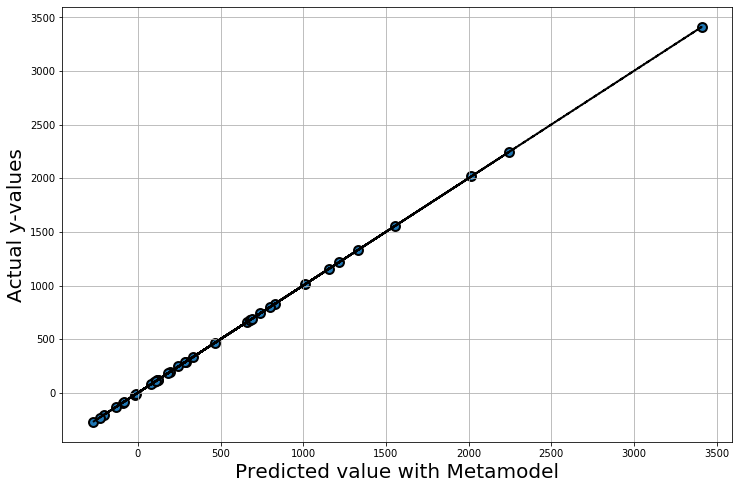

In [35]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted value with Metamodel",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred1,y_train,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred1,y_pred1, 'k--', lw=2)

(-2.226244071671245,
 1.0737559283287554,
 -117528.19268122713,
 2468095.8295624806)

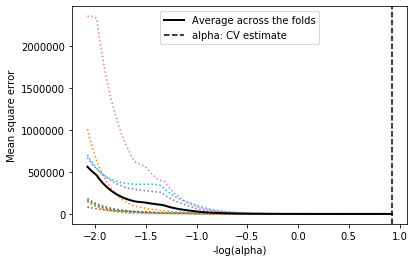

In [36]:
m_log_alphas = -np.log10(model1.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model1.mse_path_, ':')
plt.plot(m_log_alphas, model1.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model1.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.axis('tight')